In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir("C:\\Users\\Thispc\\Desktop\\python\\carpred\\wikipedia-data")

In [3]:
df= pd.read_csv('male_mentions_centrality.csv')


In [4]:
df1= pd.read_csv('female_mentions_centrality.csv')

In [5]:
df=df.drop('MOVIE NAME',axis=1)
df=df.drop('CAST',axis=1)
df

,MENTIONS,TOTAL CENTRALITY,COUNT,AVERAGE CENTRALITY
0,13.0,9219.200000,131.0,70.375573
1,11.0,29.000000,59.0,0.491525
2,5.0,469.333333,63.0,7.449735
3,2.0,0.000000,29.0,0.000000
4,4.0,94.000000,38.0,2.473684
...,...,...,...,...
9348,12.0,517.666667,114.0,4.540936
9349,2.0,429.500000,47.0,9.138298
9350,6.0,267.666667,47.0,5.695035
9351,11.0,640.833333,106.0,6.045597


In [6]:
df1=df1.drop('MOVIE NAME',axis=1)
df1=df1.drop('CAST',axis=1)
df1

,MENTIONS,TOTAL CENTRALITY,COUNT,AVERAGE CENTRALITY
0,2.0,222.500000,12.0,18.541667
1,11.0,868.166667,131.0,6.627226
2,4.0,0.000000,89.0,0.000000
3,9.0,319.000000,79.0,4.037975
4,6.0,48.000000,54.0,0.888889
...,...,...,...,...
5043,1.0,243.000000,19.0,12.789474
5044,81.0,6975.333333,596.0,11.703579
5045,22.0,565.500000,242.0,2.336777
5046,20.0,624.166667,187.0,3.337790


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MENTIONS            9348 non-null   float64
 1   TOTAL CENTRALITY    9348 non-null   float64
 2   COUNT               9348 non-null   float64
 3   AVERAGE CENTRALITY  9348 non-null   float64
dtypes: float64(4)
memory usage: 292.4 KB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MENTIONS            5043 non-null   float64
 1   TOTAL CENTRALITY    5043 non-null   float64
 2   COUNT               5043 non-null   float64
 3   AVERAGE CENTRALITY  5043 non-null   float64
dtypes: float64(4)
memory usage: 157.9 KB


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

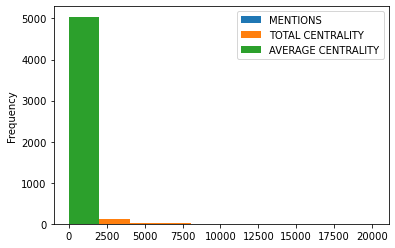

In [10]:
df1.plot(kind='hist',x='COUNT')

<AxesSubplot:ylabel='Frequency'>

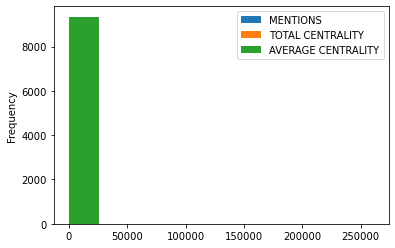

In [11]:
df.plot(kind='hist',x='COUNT')

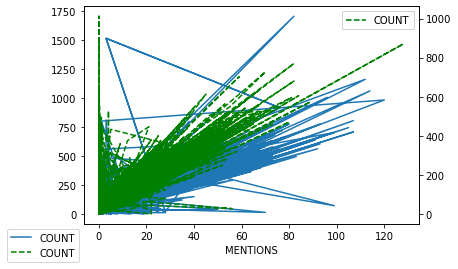

In [12]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

df.plot(x="MENTIONS", y=["COUNT"], ax=ax)
df1.plot(x="MENTIONS", y=["COUNT"], ax=ax2,ls= "--",c='green')
fig.legend(loc="upper right", bbox_to_anchor=(0,0), bbox_transform=ax.transAxes)

# data cleaning

In [13]:
df.isna().sum()

MENTIONS              5
TOTAL CENTRALITY      5
COUNT                 5
AVERAGE CENTRALITY    5
dtype: int64

In [14]:


meanv=df['COUNT'].median()
meanv

51.0

In [15]:
df['COUNT'].fillna(value=meanv,inplace=True)
df.isna().sum()

MENTIONS              5
TOTAL CENTRALITY      5
COUNT                 0
AVERAGE CENTRALITY    5
dtype: int64

In [16]:
df['MENTIONS'].fillna(value=df['MENTIONS'].mean(),inplace=True)
df.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      5
COUNT                 0
AVERAGE CENTRALITY    5
dtype: int64

In [17]:

df['TOTAL CENTRALITY'].fillna(value=df['TOTAL CENTRALITY'].mean(),inplace=True)
df.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 0
AVERAGE CENTRALITY    5
dtype: int64

In [18]:
df['AVERAGE CENTRALITY'].fillna(value=df['AVERAGE CENTRALITY'].median(),inplace=True)
df.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 0
AVERAGE CENTRALITY    0
dtype: int64

In [19]:
df.isna().sum()


MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 0
AVERAGE CENTRALITY    0
dtype: int64

In [20]:
X=df.drop('COUNT',axis=1)
y=df['COUNT']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [21]:
X_train

,MENTIONS,TOTAL CENTRALITY,AVERAGE CENTRALITY
815,1.0,26.000000,3.714286
2131,15.0,649.000000,3.345361
7565,7.0,1018.030159,5.784262
3946,23.0,7486.180000,40.908087
6134,14.0,352.000000,2.444444
...,...,...,...
5734,6.0,656.000000,5.085271
5191,1.0,13.000000,1.625000
5390,3.0,439.833333,8.145062
860,1.0,54.000000,4.153846


# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
lr.predict(X_test)
Y_pred = lr.predict(X_test)

In [32]:
Y_pred

array([200.77183203,  59.80786073, 174.80458867, ...,  53.42512193,
        35.53329541,  54.73831376])

In [33]:
cutoff = 0.7                              
y_pred_classes = np.zeros_like(Y_pred)    
y_pred_classes[Y_pred > cutoff] = 1       

In [34]:
y_test_classes = np.zeros_like(Y_pred)
y_test_classes[Y_test > cutoff] = 1

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[   0   78]
 [  26 2235]]


In [36]:
print ("Accuracy : ", accuracy_score(y_test_classes, y_pred_classes))

Accuracy :  0.9555365540829415


# input

In [37]:
features = np.array([[14.0,352.000000,2.444444]])

# output


In [38]:
Y_pred = lr.predict(features)
Y_pred =[Y_pred][0]
print(Y_pred)

[134.39345333]


C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
df1.isna().sum()

MENTIONS              5
TOTAL CENTRALITY      5
COUNT                 5
AVERAGE CENTRALITY    5
dtype: int64

In [40]:
df1['MENTIONS'].mode()[0]

1.0

In [41]:
df1['MENTIONS']=df1['MENTIONS'].fillna(value=df1['MENTIONS'].mode()[0])
df1.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      5
COUNT                 5
AVERAGE CENTRALITY    5
dtype: int64

In [42]:
df1['TOTAL CENTRALITY'].median()

138.0

In [43]:
df1['TOTAL CENTRALITY']=df1['TOTAL CENTRALITY'].fillna(value=df1['TOTAL CENTRALITY'].median())
df1.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 5
AVERAGE CENTRALITY    5
dtype: int64

In [44]:
df1['COUNT'].median()

45.0

In [45]:
df1['COUNT']=df1['COUNT'].fillna(value=df1['COUNT'].median())
df1.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 0
AVERAGE CENTRALITY    5
dtype: int64

In [46]:
df1['AVERAGE CENTRALITY'].mean()

4.955028816344631

In [47]:
df1['AVERAGE CENTRALITY']=df1['AVERAGE CENTRALITY'].fillna(value=df1['AVERAGE CENTRALITY'].mean())
df1.isna().sum()

MENTIONS              0
TOTAL CENTRALITY      0
COUNT                 0
AVERAGE CENTRALITY    0
dtype: int64

In [48]:
X=df1.drop('COUNT',axis=1)
y=df1['COUNT']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
X_train

,MENTIONS,TOTAL CENTRALITY,AVERAGE CENTRALITY
4288,7.0,0.000000,0.000000
1258,1.0,197.000000,16.416667
3738,2.0,0.000000,0.000000
3515,0.0,853.500000,21.884615
1116,15.0,160.000000,1.649485
...,...,...,...
4426,0.0,315.000000,4.846154
466,7.0,106.000000,1.247059
3092,9.0,184.190476,2.361416
3772,11.0,264.000000,2.808511


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [51]:
lr.predict(X_test)
Y_pred = lr.predict(X_test)
Y_pred

array([ 14.63654958,  49.82981486,  64.86064475, ...,  52.16393304,
        83.77782584, 129.04476219])

In [52]:
cutoff = 0.7                              
y_pred_classes = np.zeros_like(Y_pred)    
y_pred_classes[Y_pred > cutoff] = 1 
y_test_classes = np.zeros_like(Y_pred)
y_test_classes[Y_test > cutoff] = 1

In [53]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[   0   32]
 [  21 1209]]


In [54]:
print ("Accuracy : ", accuracy_score(y_test_classes, y_pred_classes))

Accuracy :  0.9580031695721077


# Comparison

In [55]:
import datacompy

In [56]:
compare = datacompy.Compare(df,df1,join_columns='MENTIONS')

In [57]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        4  9353
1       df2        4  5048

Column Summary
--------------

Number of columns in common: 4
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: mentions
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 5,026
Number of rows in df1 but not in df2: 4,327
Number of rows in df2 but not in df1: 22

Number of rows with some compared columns unequal: 4,996
Number of rows with all compared columns equal: 30

Column Comparison
-----------------

Number of columns compared with some values unequal: 3
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 14,727

Columns with Unequal Values or Types
------------------------------------

               Column df1 dtype df2 dtype  # Unequal       Max 

# input


In [61]:
mention1=float(input("enter the mentions "))
tolcenter=float(input("enter the total centrality "))
avg=float(input("enter the average centrality "))

enter the mentions 37.0
enter the total centrality 2700.333333
enter the average centrality 10.801333


In [62]:
features = np.array([[mention1,tolcenter,avg]])

# output


In [63]:
Y_pred = lr.predict(features)
Y_pred =[Y_pred][0]
print(Y_pred)

[322.31727699]


C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
